# Dimensionality Reduction on <font color=gray>Linear Data</font> using <font color=red>SVD </font>

We apply __Singular Value Decomposition (SVD)__ to reduce the number of features. We've already baselined with original set of features <a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Regression%20Model.ipynb'/>Baseline Regression Model</a>. After reducing the features using SVD, we fit a regression model to the data and compare with baseline.

<img src='Data/Projection in Dimensionality Reduction.png' width=500/>

In [1]:
import pylab
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
diabetes_df = pd.read_csv('Data/pima-indians-diabetes.data.csv')
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.shape

(768, 9)

In [4]:
features = list(diabetes_df.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [5]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    return model

In [6]:
# Factor Analysis uses 'Singular Value Decomposition (SVD)' behind the scene
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    fact_a = FactorAnalysis(n_components=n, random_state=10)
    x_new = fact_a.fit_transform(x, y)
    
    return fact_a, pd.DataFrame(x_new)

In [7]:
def compare_results(result_dict):
    for key in result_dict:
        print('Test: ', key)
        
        print('accuracy score: ',  result_dict[key]['accuracy'])
        print('precision score: ', result_dict[key]['precision'])
        print('recall score: ',    result_dict[key]['recall'])
        print()

In [8]:
def build_model(name_of_y_col, names_of_x_cols, dataset, *hyperparameters):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    fa_obj, X_new = do_factor_analysis(X, Y, *hyperparameters)
    
    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    model = logistic_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {
        'fact_a_obj': fa_obj,
        'transform_x': X_new,
        'accuracy': acc,
        'precision': prec,
        'recall': recall
    }

In [9]:
def visualize_results(result_dict):
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    
    plt.figure(figsize=(8, 4))
    plt.plot(n_components, acc)
    
    pylab.ylim([0, 1])
    
    plt.grid(True)
    plt.xticks(range(0, max(n_components)+1))
    plt.xlabel('n components')
    plt.ylabel('accuracy')

In [10]:
result_dict = {}

for i in range(1, 9):
    result_dict['n_components - ' + str(i)] = build_model('class', features, diabetes_df, i)

In [11]:
compare_results(result_dict)

Test:  n_components - 1
accuracy score:  0.6818181818181818
precision score:  0.6
recall score:  0.06

Test:  n_components - 2
accuracy score:  0.7532467532467533
precision score:  0.6
recall score:  0.574468085106383

Test:  n_components - 3
accuracy score:  0.7402597402597403
precision score:  0.6578947368421053
recall score:  0.4807692307692308

Test:  n_components - 4
accuracy score:  0.7727272727272727
precision score:  0.7428571428571429
recall score:  0.5

Test:  n_components - 5
accuracy score:  0.8246753246753247
precision score:  0.7631578947368421
recall score:  0.6170212765957447

Test:  n_components - 6
accuracy score:  0.7402597402597403
precision score:  0.6216216216216216
recall score:  0.46938775510204084

Test:  n_components - 7
accuracy score:  0.7662337662337663
precision score:  0.75
recall score:  0.5357142857142857

Test:  n_components - 8
accuracy score:  0.7662337662337663
precision score:  0.7
recall score:  0.625



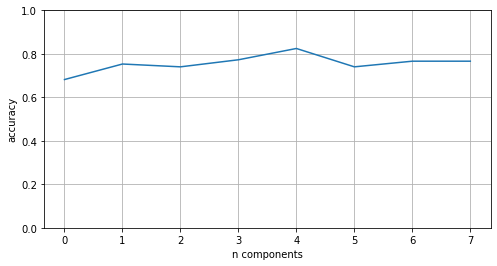

In [12]:
visualize_results(result_dict)

<font color=red>__Factor Analysis__</font>

In [14]:
# Estimated 'noise variance' for each feature

fa_obj_final = result_dict['n_components - 2']['fact_a_obj']
print(fa_obj_final.noise_variance_)

[1.09624791e+01 1.28409382e+01 3.64578608e+02 2.03475597e+02
 2.01914855e+00 5.79365953e+01 1.05156608e-01 1.25615935e+02]


Text(0, 0.5, 'Estimated Noise Variance for each feature')

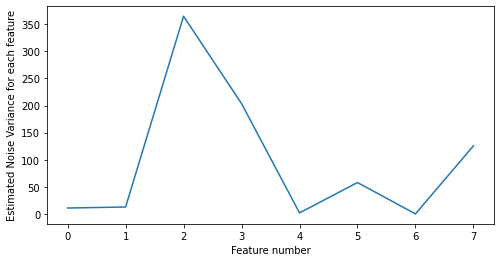

In [15]:
feature_num = list(range(0, 8))

plt.figure(figsize=(8, 4))
plt.plot(feature_num, fa_obj_final.noise_variance_)

plt.xlabel('Feature number')
plt.ylabel('Estimated Noise Variance for each feature')

In [28]:
transform_x_final = result_dict['n_components - 2']['transform_x']
transform_x_final.shape

(768, 2)

Text(0, 0.5, 'transform_x_final[1]')

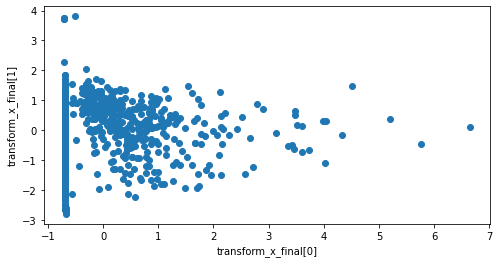

In [29]:
figure = plt.figure(figsize=(8, 4))

plt.scatter(transform_x_final[0], transform_x_final[1], cmap='Spectral')

plt.xlabel('transform_x_final[0]')
plt.ylabel('transform_x_final[1]')

Observations:
- From the scatter plot, it is clear that the transformed factors captured lot of variance